## Observations and Insights

## Dependencies and starter code

In [1]:
#interactive notebook
%matplotlib inline

# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import os

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen= mouse_data.groupby('Drug Regimen')
mean_volume=drug_regimen['Tumor Volume (mm3)'].mean()
median_volume=drug_regimen['Tumor Volume (mm3)'].median()
var_volume=drug_regimen['Tumor Volume (mm3)'].var()
std_volume=drug_regimen['Tumor Volume (mm3)'].std()
sem_volume=drug_regimen['Tumor Volume (mm3)'].sem()
summary_statistics=df=pd.DataFrame(
{
    'Mean':mean_volume,
    'Median':median_volume,
    'Variance':var_volume,
    'Standard Deviation':std_volume,
    'SEM':sem_volume
}
)
summary_statistics['Mean']=summary_statistics['Mean'].map("{:.2f} mm3".format)
summary_statistics['Median']=summary_statistics['Median'].map("{:,.2f} mm3".format)
summary_statistics['Variance']=summary_statistics['Variance'].map("{:,.2f} mm3".format)
summary_statistics['Standard Deviation']=summary_statistics['Standard Deviation'].map("{:,.2f} mm3".format)
summary_statistics['SEM']=summary_statistics['SEM'].map("{:,.2f} mm3".format)
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68 mm3,41.56 mm3,24.95 mm3,4.99 mm3,0.33 mm3
Ceftamin,52.59 mm3,51.78 mm3,39.29 mm3,6.27 mm3,0.47 mm3
Infubinol,52.88 mm3,51.82 mm3,43.13 mm3,6.57 mm3,0.49 mm3
Ketapril,55.24 mm3,53.70 mm3,68.55 mm3,8.28 mm3,0.60 mm3
Naftisol,54.33 mm3,52.51 mm3,66.17 mm3,8.13 mm3,0.60 mm3
Placebo,54.03 mm3,52.29 mm3,61.17 mm3,7.82 mm3,0.58 mm3
Propriva,52.32 mm3,50.85 mm3,42.35 mm3,6.51 mm3,0.51 mm3
Ramicane,40.22 mm3,40.67 mm3,23.49 mm3,4.85 mm3,0.32 mm3
Stelasyn,54.23 mm3,52.43 mm3,59.45 mm3,7.71 mm3,0.57 mm3


## Bar plots

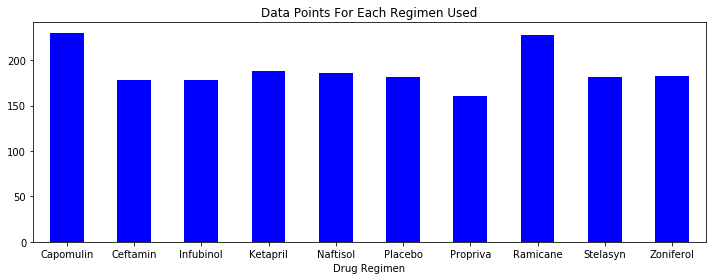

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points=drug_regimen['Mouse ID'].count()
data_points.plot(kind="bar", figsize=(10,4), facecolor="blue", rot=0)
plt.title('Data Points For Each Regimen Used')

plt.tight_layout()
plt.show()

<BarContainer object of 10 artists>

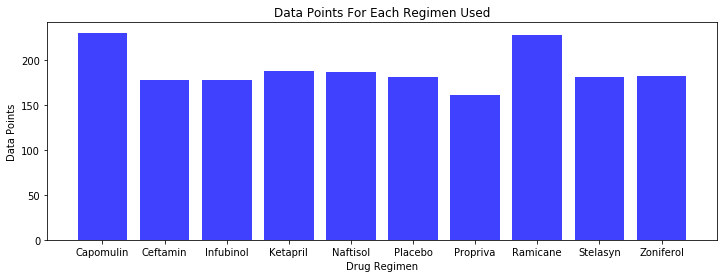

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drug_regimens = summary_statistics.index.tolist()


x_axis = drug_regimens

data_points_pyplot=(mouse_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis =np.arange(len(data_points))
x_axis = drug_regimens


plt.figure(figsize=(12,4))

plt.title('Data Points For Each Regimen Used')
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")




plt.bar(x_axis, data_points, facecolor="blue", alpha=0.75, align="center")



## Pie plots

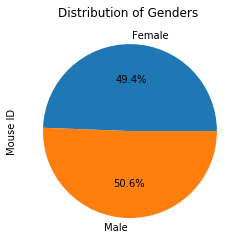

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex= mouse_data.groupby('Sex')
data_gender=sex['Mouse ID'].count()
mouse_pie=data_gender.plot(kind="pie", autopct='%1.1f%%', title=('Distribution of Genders '))





([<matplotlib.patches.Wedge at 0x1a1d2288d0>,
 [Text(0.022900912879185074, 1.1997814585120492, 'Female'),
  Text(-0.02099250347258646, -1.0997996703027118, 'Male')],
 [Text(0.013358865846191293, 0.699872517465362, '49.4%'),
  Text(-0.011450456439592612, -0.5998907292560246, '50.6%')])

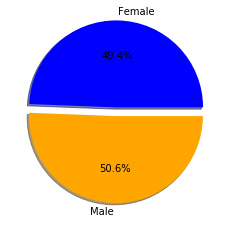

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gendercount_pyplot=(mouse_data.groupby(["Sex"])["Mouse ID"].count()).tolist()
colors = ["b", "orange"]
labels = ["Female", "Male"]
explode = (0.1, 0)
plt.pie(gendercount_pyplot, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen